# Run Inference on a Play

Use this notebook to run inference using a pre-trained tackle probability model on an entire play. Prior to using this notebook, you should have already run load_data.ipynb and train_model.ipynb to save a pre-trained model in the save/ dir. 

After running the code, gifs of the birds eye view of the field and the tackle probability chart will be saved to the plotting/generated_plots/ dir

Steps executed below: 
1) Load model trained from train_model.ipynb
2) Load tracking data preprocessed from load_data.ipynb
3) Run Inference!

In [10]:
import pickle
import xgboost as xgb
import os
import pandas as pd
from inference import run_inference

root_dir = os.getcwd()

In [17]:
# Load pre-trained XGBoost Model 
print("Loading Model...")
clf = xgb.XGBClassifier()
clf.load_model(os.path.join(root_dir, "save/XGBoost_01082024-1705.model"))

# Load tracking data 
print("Loading Tracking Data...")
df_tracking_test = pickle.load(open(os.path.join(root_dir, "save/test_tracking_data_01072024-2324.pkl"), "rb"))
df_tracking_train = pickle.load(open(os.path.join(root_dir, "save/train_tracking_data_01072024-2324.pkl"), "rb"))
df_tracking = pd.concat([df_tracking_test, df_tracking_train])
ts_lists = pickle.load(open(os.path.join(root_dir, "save/tackle_sequences_01072024-2324.pkl"), "rb"))
tackle_sequences_train = ts_lists["train"]
tackle_sequences_test = ts_lists["test"]

Loading Model...
Loading Tracking Data...


## Instructions
- Use the **gameId** and **playId** parameters to select which play to run inference on. 
- Use the **defenseIds** parameter to select which defenders to predict tackle probabilities. 
- Use the **highlight_players** parameter to select which defenders to highlight in the birds eye view plot and the tackle probability chart. 

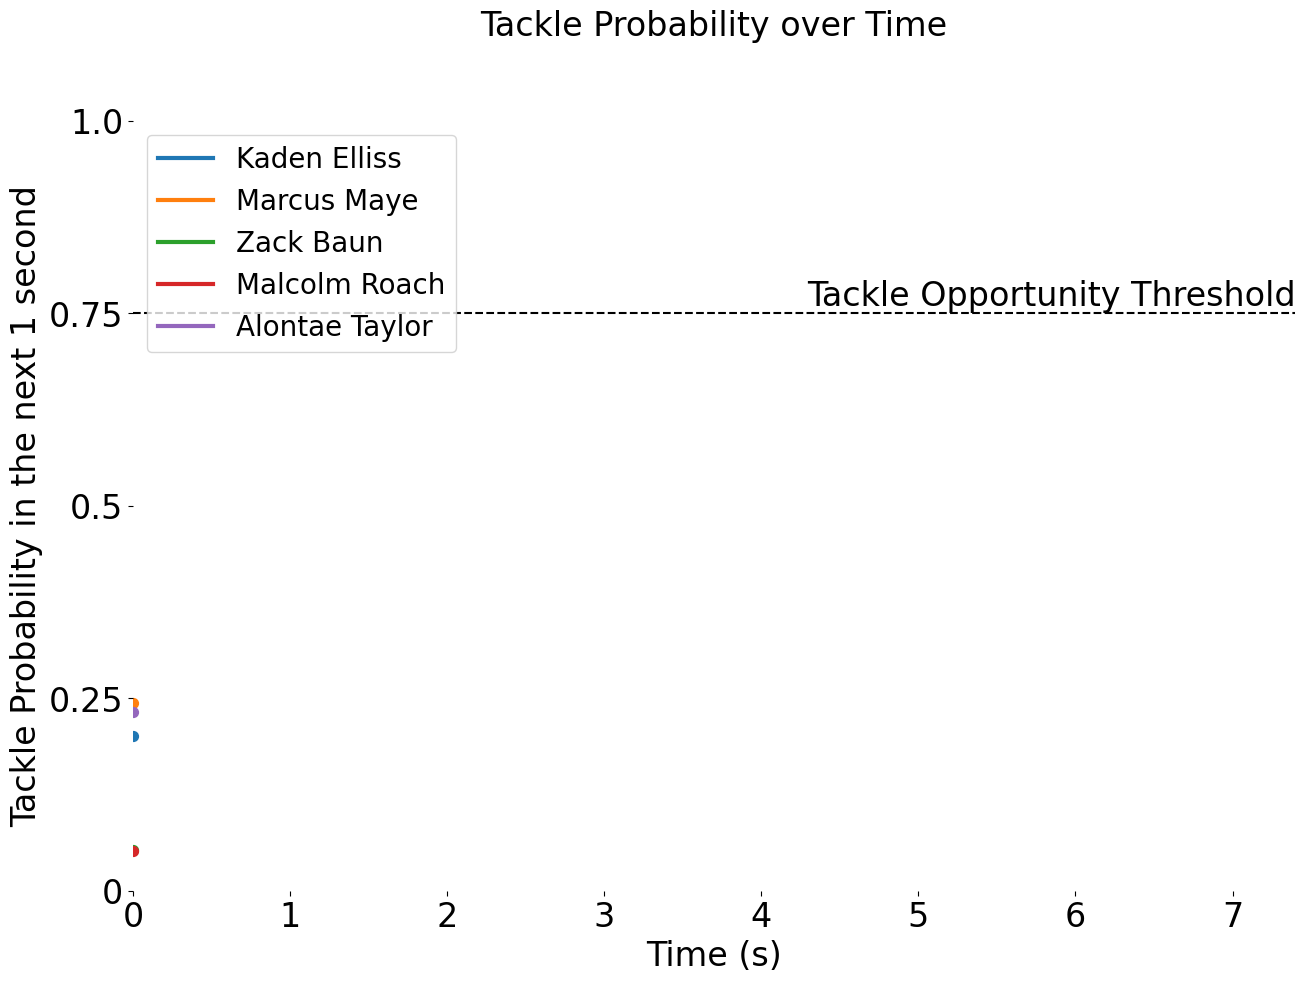

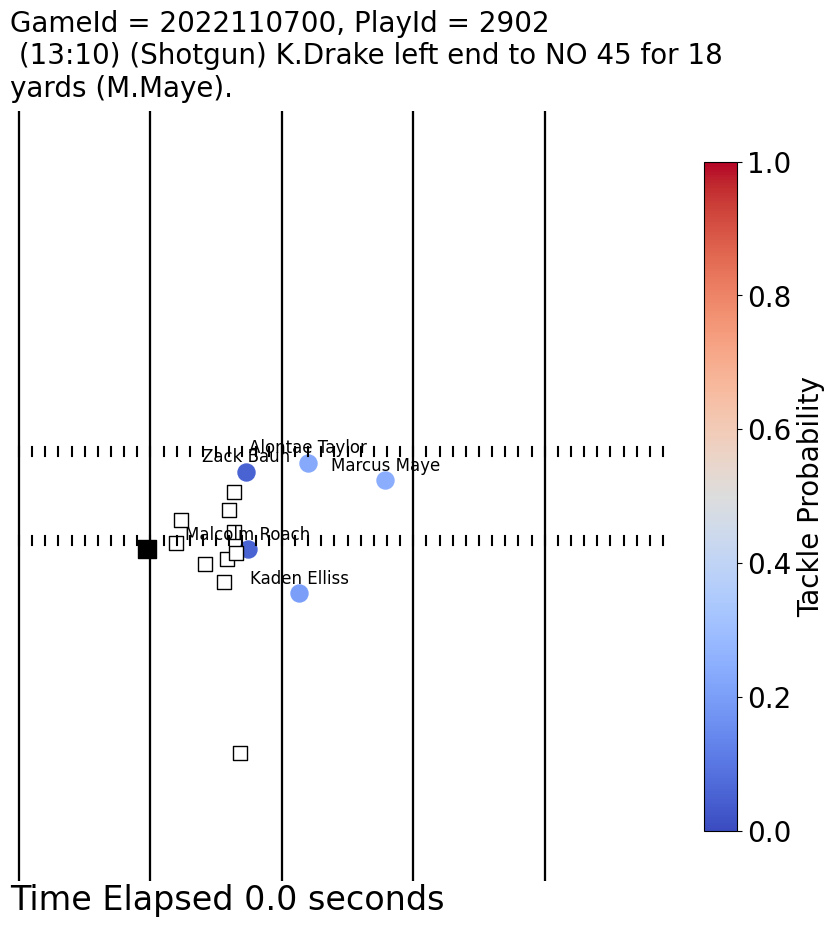

In [16]:
# Run inference on a specific play
gameId = 2022110700
playId = 2902
PLAYERS_FNAME = os.path.join(root_dir, "data/players.csv")
PLAYS_FNAME = os.path.join(root_dir, "data/plays.csv")
OUT_DIR = os.path.join(root_dir, "plotting/generated_plots/")
defenseIds = ["Kaden Elliss", "Marcus Maye", "Zack Baun", "Malcolm Roach", "Alontae Taylor"]
highlight_players = ["Kaden Elliss", "Marcus Maye", "Zack Baun", "Malcolm Roach", "Alontae Taylor"]

probs_dict = run_inference(clf, df_tracking, gameId, playId, PLAYERS_FNAME, PLAYS_FNAME, 
                           defenseIds, display=True, output_dir=OUT_DIR, 
                           highlight_players=highlight_players, presentation_mode=False)
